Python_13_9.Закрепление знаний

In [7]:
import pandas as pd
churn_data = pd.read_csv('data_9/churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов?

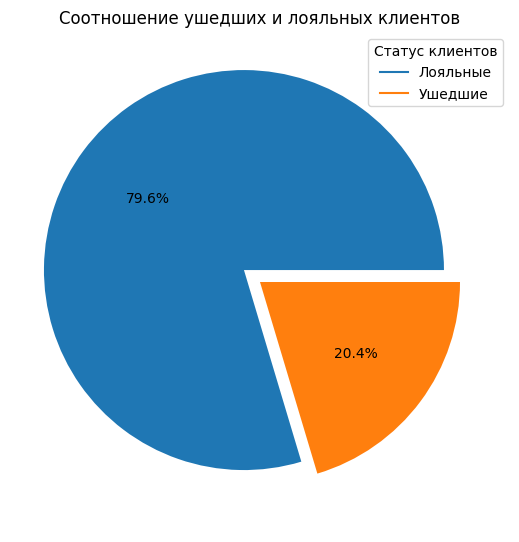

In [81]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# найдем количества ушедших и, соответственно, лояльных клиентов
exited_customers = churn_data['Exited'].value_counts()
# для определения статического соотношения 1 показателя (ушедший\лояльный) используем круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_customers, # данные отображаемого показателя
    autopct='%.1f%%', # отображение долей на диаграмме
    explode=[0.1, 0] # смещение сектора, показывающего долю ушедших клиентов
   );
# оформим легенду диаграммы
line1, = axes.plot([0], label='Лояльные')
line2, = axes.plot([1], label='Ушедшие')
axes.legend(title='Статус клиентов', handles=[line1, line2])
# оформим заголовок
axes.set_title('Соотношение ушедших и лояльных клиентов');

Комментарии: Из приведенной выше круговой диаграммы "Соотношение ушедших и лояльных клиентов" видно, что доля ушедших от обслуживания банком клиентов составила 20.4% от общего числа клиентов банка. Это почти в 4 раза меньше количества лояльных клиентов.

9.2. Распределение баланса пользователей, у которых на счету больше 2 500 долларов. 

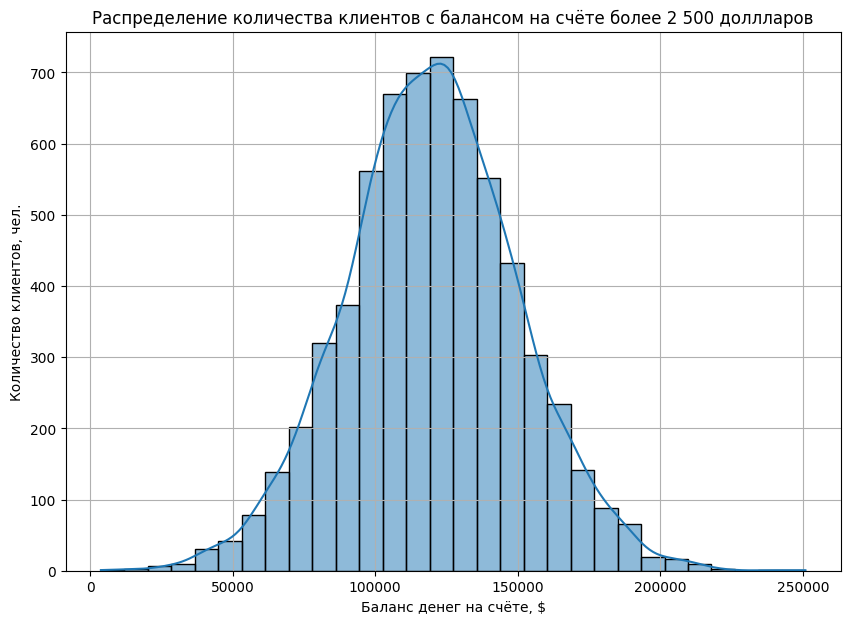

In [39]:
import seaborn as sns

# выделим клиентов с счетом более 2.5 тыс. долларов
customers = churn_data[churn_data['Balance'] > 2500]

# для анализа распределения числового признака применим гистограмму
fig = plt.figure(figsize=(10, 7)) # задаем размеры фигуры
boxplot = sns.histplot(
    data=customers, # анализируемые данные
    x='Balance', # ось абсцисс
    bins=30, # количество столбцов гистограммы
    kde=True # отобразить кривую распределения
)
# оформим легенду и заголовок
boxplot.set_title('Распределение количества клиентов с балансом на счёте более 2 500 доллларов');
boxplot.set_xlabel('Баланс денег на счёте, $');
boxplot.set_ylabel('Количество клиентов, чел.');
boxplot.grid() # отобразить координатную сетку

Комментарии: Из гистограммы распределения клиентов банка с балансом более 2.5 тыс. долларов видно, что максимальные суммы на счетах клиентов составляют чуть более 250 тыс. долларов. Основная масса клиентов банка в рассматриваемом диапазоне имеет счета на суммы от 100 до 150 тыс. долларов и их количество резко снижается в обе стророны. Модальное значение клиентов (приблизительно 710 человек) имеет счета на сумму 120 - 130 тыс. В целом данное распределение соответствует нормальному распределению, аномалий не выявлено.

9.3. Распределение баланса клиентов в разрезе признака оттока. 

In [101]:
import plotly
import plotly.express as px

# для анализа распределения клиентов в разрезе оттока построим коробчатую диаграмму
fig1 = px.box(
    data_frame=churn_data, #анализируемые данные
    x="Balance", #ось абсцисс
    color="Exited", #расцветка в зависимости от статуса клиента
    labels={'Balance':'Баланс денег на счёте, $'}, # подпись оси абсцисс
    title='Коробчатая диаграмма распределения ушедших и лояльных клиентов', #заголовок  
)
fig1.show()

# для большей информативности дополним гистограммой распределения 
fig2 = px.histogram(
    data_frame=churn_data, #анализируемые данные
    x="Balance", #ось абсцисс
    color="Exited" #расцветка в зависимости от статуса клиента 
)
# оформим подписи координатных осей и заголовок
fig2.update_layout(title='Гистограмма распределение ушедших и лояльных клиентов',
                  xaxis_title='Баланс денег на счёте, $',
                  yaxis_title='Количество клиентов, чел.')
fig2.show()

Комментарии: Сравнивая гистограммы распределения баланса счетов ушедших и лояльных клиентов, можно заключить, что с учетом соотношения их количеств, распределения аналогичны: основная часть клиентов имеют вклады до 2 500 долларов, затем в соответствии с нормальным распределением происходит рост с пиком в диапазоне 120 - 130 тыс. долларов и постепенное снижение сумм вкладов. 
Однако наблюдаются и некоторые отличия. Так медианое значение сумм на счетах ушедших клиентов 109 тыс. долларов, что на 17 тыс. долларов больше, чем у оставшихся. Кроме того максимальные суммы вкладов (252.5 тыс.) также фиксируются у ушедших клиентов. В связи с этим можно предположить, что именно клиенты банка с более крупными вкладами не заинтересованы в продолжении сотрудничества.

9.4. Распределение клиентов по  возрасту в разрезе признака оттока. 

In [104]:

# для анализа распределения клиентов по возрасту в разрезе оттока построим коробчатую диаграмму
fig1 = px.box(
    data_frame=churn_data, #анализируемые данные
    x="Age", #ось абсцисс
    color="Exited", #расцветка в зависимости от статуса клиента
    labels={'Age':'Возраст клиентов, лет'}, # подпись оси абсцисс
    title='Коробчатая диаграмма распределения ушедших и лояльных клиентов по возрасту', #заголовок  
)
fig1.show()

# для большей информативности дополним гистограммой распределения 
fig2 = px.histogram(
    data_frame=churn_data, #анализируемые данные
    x="Age", #ось абсцисс
    color="Exited", #расцветка в зависимости от статуса клиента 
)
# оформим подписи координатных осей и заголовок
fig2.update_layout(title='Гистограмма распределение ушедших и лояльных клиентов по возрасту',
                  xaxis_title='Возраст клиентов, лет',
                  yaxis_title='Количество клиентов, чел.')
fig2.show()

Комментарии: По возрастному признаку отличия между ушедшими и лояльными клиентами проявляются более ярко. Медианный возраст ушедших клиентов - 45 лет, в то время как оставшихся всего - 36. При этом 50% лояльных клиентов имеют возраст 31-41 год, а 50% ушедших - 38-51. При этом стоит отметить, что в группе лояльных клиентов наблюдается большее число потенциальных выбросов, например, клиент в возрасте 92 лет, что довольно необычно, но не является невозможным. 
Для уменьшение оттока банку стоит обратить внимание на группу клиентов в возрасте старше 40 лет, это также актуально и для стратегии привлечения потенциальных клиентов.

9.5. Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 

In [110]:
#строим график
fig = px.scatter(
    data_frame=churn_data, #датафрейм
    x='CreditScore', #ось абсцисс
    y='EstimatedSalary', #ось ординат
    color='Exited', #расцветка в зависимости от статуса клиента
    labels={'Exited':'Статус клиентов'},
    height=500, #высота
    width=1000 #ширина
)
# оформим подписи координатных осей и заголовок
fig.update_layout(title='Взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиентов',
                  xaxis_title='Кредитный рейтинг клиента, балл',
                  yaxis_title='Предполагаемая заработная плата клиента, $')
fig.show()


Комментарии: На основании диаграммы рассеяния нельзя проследить четкую взаимосвязь между кредитным рейтингом клиентов и их предполагаемой заработной платой, т.к. большая часть имеет рейтинг от 550 до 750 баллов во всем диапазоне заработных плат (0-200 тыс. долларов). Ушедшие клиенты также распределены довольно равномерно, но стоит выделить диапазон кредитного рейтинга от 0 до 400 баллов (минимальный диапазон), в котором представлены исключительно ушедшие клиенты, что, возможно, является потенциальным поводом для их ухода.

9.6. Кто чаще уходит, мужчины или женщины? 

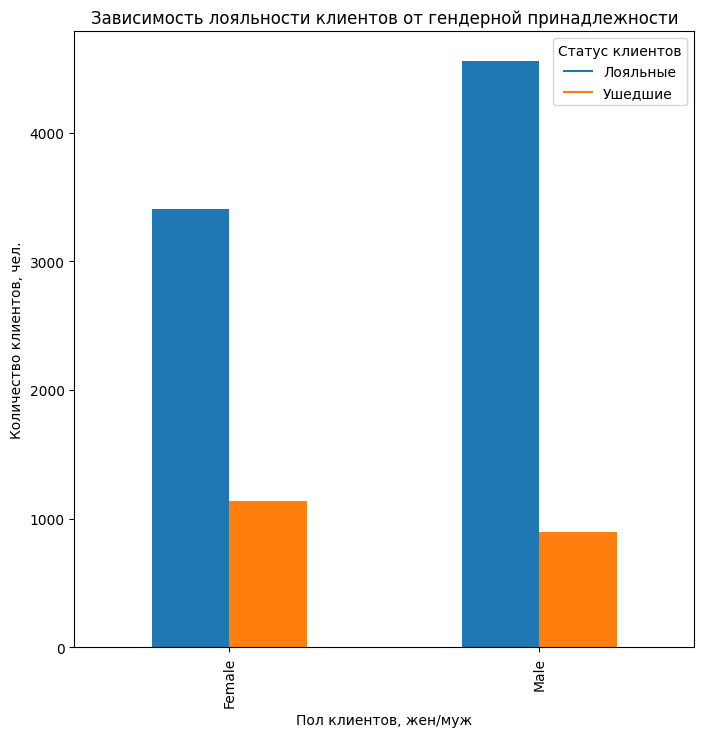

In [149]:

# найдем количества мужчин и женщин среди клиентов в разрезе лояльности 
gender_of_exited = churn_data.pivot_table('CustomerId', # столбец, по которому получим сводные данные
                            index='Gender', # столбец, значения которого станут строками сводной таблицы
                            columns='Exited', # столбец, значения которого станут столбцами сводной таблицы
                            aggfunc='count', # подсчет количества значений
                            fill_value=0 # заменим пропуски значений на 0
)

fig, axes = plt.subplots(figsize=(8, 8))
gender_of_exited.plot(
    kind='bar',
    ax=axes
);
# оформим заголовок и легенду
line1, = axes.plot([0], label='Лояльные')
line2, = axes.plot([1], label='Ушедшие')
axes.legend(title='Статус клиентов', handles=[line1, line2])
axes.set_title('Зависимость лояльности клиентов от гендерной принадлежности')
axes.set_xlabel('Пол клиентов, жен/муж')
axes.set_ylabel('Количество клиентов, чел.');

Комментарии: Количество ушедших женщин больше, чем мужчин. Также в связи с этим стоит отметить, что количество лояльных мужчин значительно больше (примерно на тысячу), чем женщин. Т.е. стратегия банка в сфере привлечения и удержания клиентов, если рассматривать её в разрезе гендера, должна быть направлена в большей степени в сторону женщин.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 

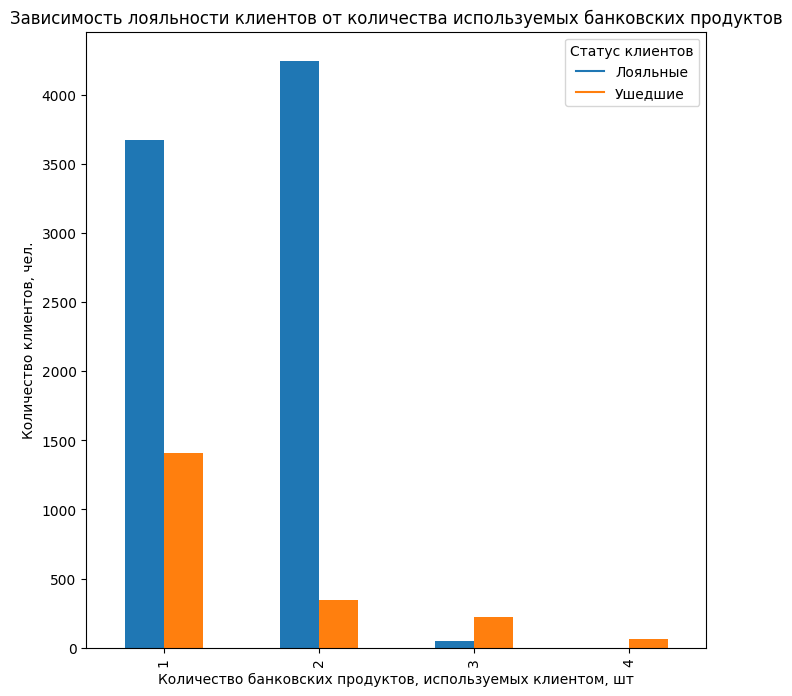

In [146]:
# создадим сводную таблицу, показывающую количество используемых банковских продуктов в разрезе лояльности клиентов
products = churn_data.pivot_table('CustomerId', # столбец, по которому получим сводные данные
                            index='NumOfProducts', # столбец, значения которого станут строками сводной таблицы
                            columns='Exited', # столбец, значения которого станут столбцами сводной таблицы
                            aggfunc='count', # подсчет количества значений
                            fill_value=0 # заменим пропуски значений на 0
)
# построим многоуровневую столбчатую диаграмму
fig, axes = plt.subplots(figsize=(8, 8))
products.plot(
    kind='bar',
    ax=axes
);
# оформим заголовок и легенду
line1, = axes.plot([0], label='Лояльные')
line2, = axes.plot([1], label='Ушедшие')
axes.legend(title='Статус клиентов', handles=[line1, line2])
axes.set_title('Зависимость лояльности клиентов от количества используемых банковских продуктов')
axes.set_xlabel('Количество банковских продуктов, используемых клиентом, шт')
axes.set_ylabel('Количество клиентов, чел.');

Комментарии: Наибольшая группа лояльных клиентов (около 4250 человек) использует 2 банковских продукта, чуть меньше (около 3600 человек) - только 1 и меньше всего (около 50 человек) - 3 банковских продукта. В группе ушедших клиентов наблюдается обратная зависимость: чем больше корзина банковских продуктов, тем меньше клиентов ей пользуется. При этом 4 продуктами сразу воспользовались исключительно ушедшие клиенты. Таким образом, не прослеживается прямая зависимость лояльности клиентов от количества используемых ими банковских продуктов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

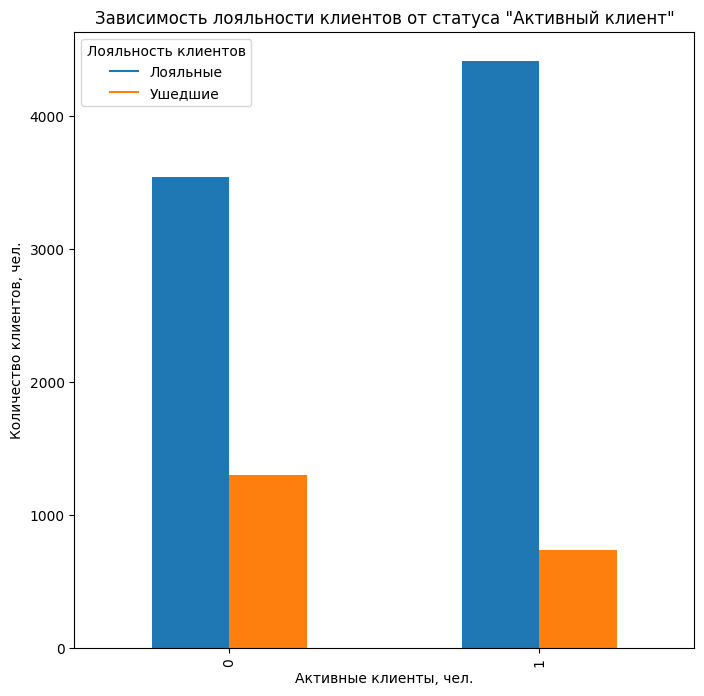

In [153]:
# найдем количества активных клиентов в разрезе лояльности 
active = churn_data.pivot_table('CustomerId', # столбец, по которому получим сводные данные
                            index='IsActiveMember', # столбец, значения которого станут строками сводной таблицы
                            columns='Exited', # столбец, значения которого станут столбцами сводной таблицы
                            aggfunc='count', # подсчет количества значений
                            fill_value=0 # заменим пропуски значений на 0
)
# построим многоуровневую столбчатую диаграмму
fig, axes = plt.subplots(figsize=(8, 8))
active.plot(
    kind='bar',
    ax=axes
);
# оформим заголовок и легенду
line1, = axes.plot([0], label='Лояльные')
line2, = axes.plot([1], label='Ушедшие')
axes.legend(title='Лояльность клиентов', handles=[line1, line2])
axes.set_title('Зависимость лояльности клиентов от статуса "Активный клиент"')
axes.set_xlabel('Активные клиенты, чел.')
axes.set_ylabel('Количество клиентов, чел.');


Комментарии: Количество неактивных клиентов среди ушедших больше, чем среди лояльных. Также активных клиентов среди лояльных гораздо больше, чем неактивных. Т.е. существует прямая зависимость лояльности клиентов и их статуса "Активный клиент". Для уменьшения оттока среди неактивных клиентов банку можно, либо стараться перевести клиентов в стутус активных клиентов (расширить сеть банкоматов, филиалов; увеличить количество услуг и продуктов, удобных для быстрых оплат, переводов и т.д.), либо предусмотреть какие-либо привелегии неактивным клиентам именно этого банка (больший процент по вкладам, уменьшение рисков и т.д.).

9.9. В какой стране доля ушедших клиентов больше?

In [159]:
# сгруппируем ушедших клиентов по географическому положению
country_of_exited = churn_data.groupby(['Geography'])['Exited'].mean() * 100

# построим тепловую карту с географической привязкой
fig = px.choropleth(
    data_frame=country_of_exited, # данные для анализа
    locations=country_of_exited.index, # данные для локации
    locationmode="country names", # режим сопоставления по странам
    color='Exited', # от чего зависит цвет
    title='Доля ушедших клиентов в зависимости от страны', # оформим заголовок
    range_color=[0, 50], # диапазон цвета
color_continuous_scale='Reds' # цветовая гамма
)
fig.show()

Комментарии: Самый большой процент уходов клиентов наблюдается в Германии (32.4%), далее - Испания (16.7%) и почти такой же уровень во Франции (16.2%). Такие отличия между Германией и другими странами (почти в 2 раза) могут свидетельствовать, например, о большей конкуренции или репутационных потерях банка в этой стране.

9.10. Зависимость кредитного рейтинга, продолжительности обслуживания в банке и лояльности клиентов

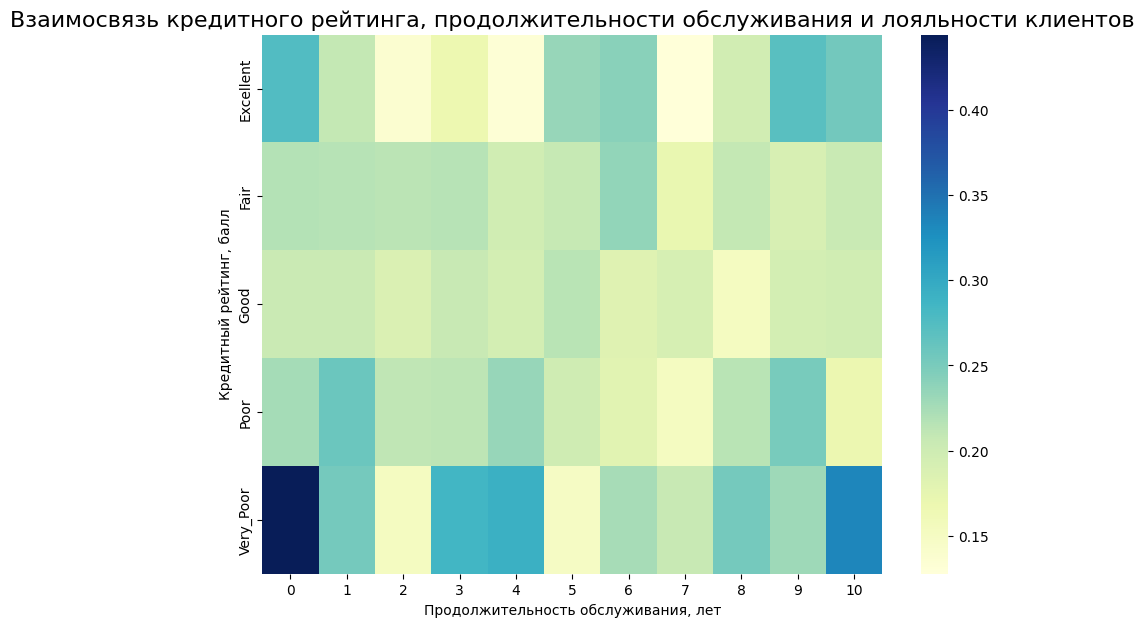

In [160]:
# переведем числовой признак CreditScore в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# применим функцию к столбцу CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# создадим сводную таблицу
pivot = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)
# построим тепловую карту
fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
# оформим легенду и заголовок
heatmap.set_title('Взаимосвязь кредитного рейтинга, продолжительности обслуживания и лояльности клиентов', fontsize=16);
heatmap.set_xlabel('Продолжительность обслуживания, лет');
heatmap.set_ylabel('Кредитный рейтинг, балл');

Комментарии: Самая большая доля ушедших клиентов в группе с самым низким кредитным рейтингом и минимальной продолжительностью обслуживания. Однако наименьшее количество ушедших отмечается ни в группе с наибольшими рейтингом и сроком обслуживания, как можно было предположить, а в группах, действительно, с максимальным рейтингом, но с продолжительностью обслуживания 2, 4 и 7 лет. В целом можно сказать, что по признаку "кредитный рейтинг" существует прямая зависимость лояльности клиентов (т.е. чем больше рейтинг, тем лояльнее клиент), а по признаку "Продолжительность обслуживания" подчиняется скорее нормальному распределению (т.е. пики лояльности приходятся на средний диапазон - с 2 до 7 лет).